In [1]:
from etc.init import *
import etc.figureslib as lib

import NotebookScripter
from NotebookScripter import run_notebook, receive_parameter
NotebookScripter.set_notebook_option(with_matplotlib_backend=None)
savefig = receive_parameter(savefig=False)
saveext = receive_parameter(saveext='pdf')
try:
    data
except NameError:
    data = receive_parameter(data=None)

if data is None:
    data = run_notebook("Figures_load_data.ipynb")
records = data.records

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
[monochrome_palette]: value was greater than 1 and was clipped.



import copy
import os.path
import itertools
from collections import Iterable, OrderedDict, namedtuple, deque
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image
from matplotlib.gridspec import GridSpec
import pymc3 as pymc
import pandas as pd
from pandas import DataFrame
from parameters import ParameterSet

from importlib import reload

import theano_shim as shim

import mackelab as ml
import mackelab.smttk as smttk
import mackelab.iotools
import mackelab.pymc3
import mackelab.parameters
import mackelab.plot
ml.parameters.Transform.namespaces['shim'] = shim

import sinn
import sinn.histories as histories
import sinn.models
from sinn.optimize.gradient_descent import FitCollection
import sinn.analyze as anlz
from sinn.analyze.axisdata import LogLikelihood, Likelihood, Probability
from sinn.analyze.axis import Axis

import fsGIF.core as core
import fsGIF.fsgif_model as fsgif_model
from fsGIF.fsgif_model

In [2]:
import seaborn as sns

In [3]:
mplconfig = run_notebook("Figures_matplotlib_config.ipynb")
inject_vars(mplconfig, globals())

In [4]:
outputname = "Fig3"

In [5]:
records.filter.script('gradient').filter.after(20180917).filter.before(20180923).summary.head(15)

,# records,reason,outcome,tags,main_file,avg . duration
20180922-143526,12,sgd_homo_sine-wn_36-cycles_L:9.0,,,fsGIF/fsGIF/gradient_descent.py,5h 26m 52s
20180922-143312,6,sgd_homo_sine-wn_22-cycles-L:5.5,,,fsGIF/fsGIF/gradient_descent.py,7h 00m 47s
20180922-143222,6,sgd_homo_sine-wn_18-cycles-L:4.5,,,fsGIF/fsGIF/gradient_descent.py,8h 04m 53s
20180921-124505,6,sgd_homo_sine-wn_14-cycles-L:3.5,,,fsGIF/fsGIF/gradient_descent.py,9h 13m 45s
20180921-124225,6,sgd_homo_sine-wn_6-cycles-L:1.5,,,fsGIF/fsGIF/gradient_descent.py,19h 18m 29s
20180920-002152,11,sgd_homo_sine-wn_18-cycles-L:4.5,Wrong data (inconsistent fit and data inputs),,fsGIF/fsGIF/gradient_descent.py,7h 48m 20s
20180920-002136,11,sgd_homo_sine-wn_22-cycles-L:5.5,Wrong data (inconsistent fit and data inputs),,fsGIF/fsGIF/gradient_descent.py,6h 47m 55s
20180919-232959,12,sgd_hetero_input-single-step,,,fsGIF/fsGIF/gradient_descent.py,5h 16m 17s
20180919-014456,8,sgd_homo_sine-wn_14-cycles-L:3.5,,,fsGIF/fsGIF/gradient_descent.py,9h 46m 23s
20180919-012742,6,sgd_homo_sine-wn_6-cycles:L-1.5,,,fsGIF/fsGIF/gradient_descent.py,20h 24m 22s


In [6]:
records.filter.script('gradient').filter.after(201810).summary.head(15)

,# records,reason,outcome,tags,main_file,avg . duration
20200302-021305,8,sgd_test_R,,,../code/fsGIF/gradient_descent.py,5h 22m 15s
20200229-013019,20,sgd_test_cstI,,,../code/fsGIF/gradient_descent.py,5h 09m 27s
20200227-202456,19,sgd_test_unclamped_ur,,,../code/fsGIF/gradient_descent.py,5h 19m 22s
20190724-211644,24,sgd_only-adapt_L:9,,,../code/fsGIF/gradient_descent.py,5h 14m 13s
20190612-125539,510,More_4_pop_fits_because_plots_are_not_good_enough,,,../code/fsGIF/gradient_descent.py,9h 03m 11s
20181113-091205,82,sgd_4pop_100-more-fits,,,fsGIF/fsGIF/gradient_descent.py,9h 15m 36s
20181107-110946,30,sgd_4pop_wider-w-prior,,,fsGIF/fsGIF/gradient_descent.py,9h 08m 58s
20181030-164336,21,sgd_sine-wn_4pop,,,fsGIF/fsGIF/gradient_descent.py,16h 16m 22s
20181030-155623,7,sgd_sine-wn_4pop,,,fsGIF/fsGIF/gradient_descent.py,0h 25m 53s
20181022-155600,41,sgd-hetero_sin-wn_fit-all,,,fsGIF/fsGIF/gradient_descent.py,5h 09m 51s


    fitlabels = {1.25: {'20180917-005042'},
                     1.5 : {'20180921-124225'},
                     2.5 : {'20180917-102645'},   # Still slower oscillations
                     3.5 : {'20180921-124505'},
                     4.5 : {'20180922-143222'},
                     5.5 : {'20180922-143312'},
                     9.  : {'0180922-143526'}}
    fitlabels = set().union(*(s for s in fitlabels.values()))
    #datalens = [1.25, 2., 3., 5., 7., 9.]
    datalens = [1.25, 1.5, 2.5, 3.5, 4.5, 5.5, 9.]

    _fitrecords = lib.RecordSet(fitlabels)
    fitrecords = {L: lib.RecordSet(_fitrecords.filter.parameters.posterior.datalen(L).list)
                  for L in datalens}

In [6]:
records.filter.any.label(['20181015-131341', '0180922-143526']).summary

,# records,reason,outcome,tags,main_file,avg . duration
20181015-131341,101,sgd-all-params_homo_L:1.25-9.0,,,fsGIF/fsGIF/gradient_descent.py,12h 47m 23s
20180922-143526,19,sgd_homo_sine-wn_36-cycles_L:9.0,,,fsGIF/fsGIF/gradient_descent.py,5h 25m 48s


In [7]:
datalens = [1.25, 2., 3., 5., 7., 9.]
#datalens = [1.25]
fitlabels = ['20181015-131341', '0180922-143526']
_fitrecords = lib.RecordSet(fitlabels)
fitrecords = {L: lib.RecordSet(_fitrecords.filter.parameters.posterior.datalen(L).list)
              for L in datalens}

In [8]:
test_sims = lib.FitResultSims(fitrecords,
                              input_params = 'brown-noise-input-2pop.params', 
                              start = 10.,
                              stop = 19.,
                              key_desc = "Data length: {}s",
                              seed0 = 335,
                              seeds = 20,
                              #seeds = 1,
                              trueseed0 = 314,
                              trueseeds = 20)

In [9]:
test_sims.fit_counts

,1.25,2.0,3.0,5.0,7.0,9.0
No. of fits,20,20,20,20,20,20


In [10]:
sim_counts = {str(model): len(t) for model,t in test_sims.traces.items()}
sim_counts['true'] = len(test_sims.Atrue)
sim_counts = pd.DataFrame({'# sims': sim_counts}).T

In [11]:
barstats = lib.BarStats(reftraces=[test_sims.Atrue[seed] for seed in test_sims.trueseeds],
                        true = [test_sims.Atrue[seed] for seed in test_sims.seeds],
                        **{str(L): list(traces.values()) for L, traces in test_sims.traces.items()})

Compute the trial-averaged statistics $\bar{ρ}$ and $\overline{RMSE}$

    traces = test_sims.Atrue
    Atruerefbar  = sum(traces[seed] for seed in test_sims.trueseeds)/len(test_sims.trueseeds)
    Atruetestbar = sum(traces[seed] for seed in test_sims.seeds)/len(test_sims.seeds)

    _ρ = lib.corr(Atruetestbar, Atruerefbar)
    ρbar = {'true': [r[0] for r in _ρ]}
    rmsebar = {'true': lib.rms(Atruetestbar, Atruerefbar)}

    for k in datalens:
        traces = test_sims.traces[k]
        Abar = sum(traces[seed] for seed in test_sims.seeds)/len(test_sims.seeds)
        _ρ = lib.corr(Abar, Atruerefbar)
        ρbar[k] = [r[0] for r in _ρ]
        rmsebar[k] = lib.rms(Abar, Atruerefbar)

In [12]:
ρbar = barstats.ρ
rmsebar = barstats.rmse

Compute the per-trial statistics

In [13]:
ρ = {}
rmse = {}
for L in datalens + ['true']:
    ρvals = np.array(list(test_sims.corr[L].values())).mean(axis=1)
    rmsevals = np.sqrt(np.mean(np.array(list(test_sims.rms[L].values()))**2, axis=1))
    ρ[L] = {'μ': ρvals.mean(), 'σ': ρvals.std(ddof=1)}
    rmse[L] = {'μ': rmsevals.mean(), 'σ': rmsevals.std(ddof=1)}

In [14]:
keys = sorted(k for k in rmse.keys() if not isinstance(k, str)) # Remove 'true' key
μvalues = np.array([rmse[key]['μ'] for key in keys])
σvalues = np.array([rmse[key]['σ'] for key in keys])

fig, (axρ, axrmse) = plt.subplots(2)
axρ.plot(datalens, [np.mean(ρbar[L]) for L in datalens], marker='D')
axrmse.plot(datalens, [np.mean(rmsebar[L]) for L in datalens], marker='D')

In [15]:
def move_ylabel_down(ax):
    x, y = ax.yaxis.label.get_position()
    ax.yaxis.label.set_y(0.8*y)

In [16]:
shadec = ml.colors.desaturate(mplconfig.colours_very_light[2], .4)
# Uncomment to test the shading
#ml.colors.display_palette(shadec)
#plt.plot([0, 1], c=mplconfig.colours[2])

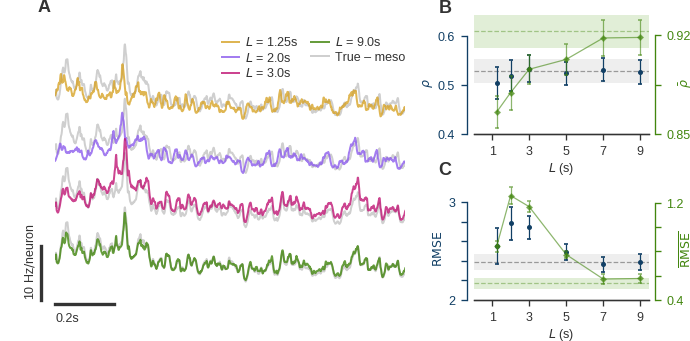

In [21]:
with plt.style.context({'figure.figsize': [textwidth, 0.8*figheight],#0.45*figheight],
                        'axes.labelpad': 2,
                        'legend.borderaxespad': 0,
                        'legend.columnspacing': 1,
                       }):
    fig = plt.figure()
    gs = GridSpec(2, 2)
    gs.set_width_ratios((2, 1))
    gs.update(hspace=0.3, wspace=0.26)
    
    with plt.style.context({'axes.prop_cycle': mpl.cycler(color=colours[::-1])}):
        k = 0
        ax = plt.subplot(gs[:,k])
        ax.set_ylim(0, 60)
        #lib.sim_compare_plot(ax, test_sims, [1.5, 2.5, 3.5, 5.5], yoffset=10, xlim=(15.15, 16.35), ylim=(0, 24))
        lib.sim_compare_plot(ax, test_sims, [1.25, 2, 3, 9], yoffset=10, xlim=(15.15, 16.35), ylim=(0, 24))
        # Shift x label down a little
        x, y = ax.xaxis.label.get_position()
        _Δy = 0.01 * np.diff(ax.get_ylim())[0]
        ax.xaxis.set_label_coords(x, y-_Δy, transform=ax.transData)
        # Shift y label left a little
        x, y = ax.yaxis.label.get_position()
        _Δx = 0.01 * np.diff(ax.get_xlim())[0]
        ax.yaxis.set_label_coords(x-_Δx, y, transform=ax.transData)
        ml.plot.subreflabel(ax, "a", x=-0.05, y=0.97)
    
    # ρ plot
    k += 1
    ax = plt.subplot(gs[0,k])
    c = colours[0]
    lib.sim_correlation_plot(ax, ρ, xticks=[1, 3, 5, 7, 9], yticks=[.4, .5, .6], ylim=(0.4, .66))
    ax.set_ylabel(r"$ρ$", color=c)
    move_ylabel_down(ax)
    ax.spines['left'].set_ec(c)
    ax.yaxis.set_tick_params(color=c)
    ax.yaxis.set_ticklabels([0.4, 0.5, 0.6], color=c)
    
    axbar = ax.twinx()
    c = colours[2]
    axbar.axhline(np.mean(ρbar['true']), color=c, alpha=0.4, linestyle='--')
    #axbar.plot(datalens, [np.mean(ρbar[L]) for L in datalens], marker='D', color=c, alpha=0.4)
    μ = lib.AxAttrs({L: np.mean(ρbar[L]) for L in ρbar})
    σ = barstats.bootstrap_std['ρ']
    axbar.axhspan(np.clip(μ.true-σ.true, -1, 1), np.clip(μ.true+σ.true, -1, 1),
                  facecolor=shadec, zorder=-3)
    axbar.errorbar(datalens, μ[datalens], σ[datalens], marker='D', color=c, alpha=0.6)
    axbar.spines['left'].set_visible(False)
    axbar.spines['right'].set_visible(True)
    axbar.set_ylim(0.85, 0.94)
    axbar.set_yticks([0.85, 0.885, 0.92])
    ml.plot.detach_spines(ax=axbar, spines='right')
    axbar.set_yticklabels(["0.85", "", "0.92"], color=c)
    axbar.spines['right'].set_ec(c)
    axbar.yaxis.set_tick_params(color=c)
    axbar.set_ylabel(r"$\bar{ρ}$", labelpad=-8, color=c)
    move_ylabel_down(axbar)
    
    ml.plot.subreflabel(ax, "b", x=-0.2, y=0.92)
    
    # RMSE plot
    ax = plt.subplot(gs[1,k])
    c = colours[0]
    lib.sim_rms_plot(ax, rmse, xticks=[1, 3, 5, 7, 9], yticks=[0, 1, 2, 3, 4], ylim=(2., 3.3))
    ax.set_yticks([2, 2.2, 2.4, 2.6, 2.8, 3])
    ax.set_yticklabels(["2", "", "", "", "", "3"])
    ax.set_ylabel(r"$\mathsf{RMSE}$", color=c)
    move_ylabel_down(ax)
    ax.spines['left'].set_ec(c)
    ax.yaxis.set_tick_params(color=c)
    ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), color=c)
    
    axbar = ax.twinx()
    c = colours[2]
    axbar.axhline(np.mean(rmsebar['true']), color=c, alpha=0.4, linestyle='--')
    μ = lib.AxAttrs({L: np.mean(rmsebar[L]) for L in rmsebar})
    σ = barstats.bootstrap_std.rmse
    #axbar.plot(datalens, μ, marker='D', color=c, alpha=0.4)
    axbar.axhspan(np.clip(μ.true-σ.true, 0, np.inf), np.clip(μ.true+σ.true, 0, np.inf),
                  facecolor=shadec, zorder=-3)
    axbar.errorbar(datalens, μ[datalens], σ[datalens], marker='D', color=c, alpha=0.6)
    axbar.spines['left'].set_visible(False)
    axbar.spines['right'].set_visible(True)
    axbar.set_ylim(0.4, 1.45)
    axbar.set_yticks([0.4, 0.6, 0.8, 1.0, 1.2])
    ml.plot.detach_spines(ax=axbar, spines='right')
    axbar.set_yticklabels(["0.4", "", "", "", "1.2"], color=c)
    axbar.spines['right'].set_ec(c)
    axbar.yaxis.set_tick_params(color=c)
    axbar.set_ylabel(r"$\overline{\mathsf{RMSE}}$", labelpad=-3, color=c)
    move_ylabel_down(axbar)
    
    ml.plot.subreflabel(ax, "c", x=-0.2, y=0.95)
    
    # Legend
    #pertrialhandle = mpl.lines.Line2D((0,1),(0,1), color=colours[0], linewidth=1.3)
    #trialavghandle = mpl.lines.Line2D((0,1),(0,1), color=colours[2], linewidth=1.3)
    #ax.legend([pertrialhandle, trialavghandle],
    #          ["per-trial", "trial-averaged"],
    #          loc='upper right', borderpad=0.3)
    
    # Margins
    fig.subplots_adjust(top=0.98, right=.94, bottom=0.12, left=0.08, wspace=0.35)

assert(outputname == "Fig3")
if savefig:
    fig.savefig("figures/" + os.path.splitext(outputname)[0] + '.' + saveext.strip('.'))

Model parameters can be recovered with a few seconds of data.
**(a)** Sample simulated traces, using parameters inferred from increasing amounts of data. Traces show the expected activity ($a$) of the excitatory population in a two population E-I model.
**(b)** Correlation between simulations $\rho$ between simulations of the inferred and true models. Correlation is calculated for each component of the expected activity; reported values are the averages across components.
**(c)** Root-mean-square error between simulations of the inferred and true models. Mean is taken across time points and components of the expected activity.

## How many spikes used to train the model ?

In [18]:
rec = lib.Record(records.filter.label('20180922-143526').latest)

In [19]:
Ahist = ml.iotools.load(core.data_dir + '/activity/' + ml.parameters.digest(rec.parameters.posterior.data.params))

In [20]:
N = rec.parameters.posterior.model.params.N
Δt = rec.parameters.posterior.data.params.dt

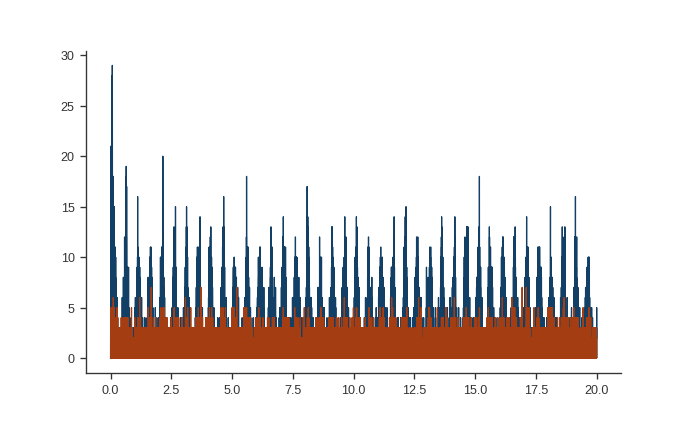

In [21]:
nhist = Ahist*N*Δt
plt.figure()
ax = plt.subplot()
ax.plot(nhist.time, nhist.trace);

In [22]:
nhist[10.:19.].sum(axis=0) / 9

ShimmedShared([2528.    ,  914.2222], dtype=float32)

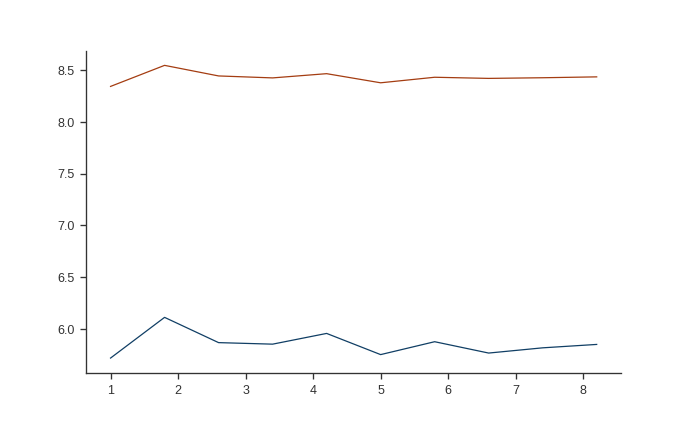

In [23]:
ΔT = 8.
Tlst = 9.-ΔT + np.arange(10)/10*ΔT
λs = np.array([nhist[10.:10.+T].sum(axis=0) / T / N for T in Tlst])
plt.figure()
ax = plt.subplot()
ax.plot(Tlst, λs);

In [24]:
firing_rate_training = λs.mean(axis=0)
firing_rate_training

array([5.85960844, 8.42789979])

Number of spikes for 1, 5 and 7 seconds

In [25]:
num_spikes_training = ((λs.mean(axis=0) * N).sum() * np.array([1, 5, 7])).round()
num_spikes_training

array([ 3485., 17426., 24396.])